In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px

In [2]:
churn_data = pd.read_csv('churn.csv')
churn_data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

### Столбцы таблицы:

1. RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
2. CustomerId — идентификатор клиента
3. Surname — фамилия клиента
4. CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
5. Geography — страна клиента (банк международный)
6. Gender — пол клиента
7. Age — возраст клиента
8. Tenure — сколько лет клиент пользуется услугами банка
9. Balance — баланс на счетах клиента в банке
10. NumOfProducts — количество услуг банка, которые приобрёл клиент
11. asCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
12. IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
13. EstimatedSalary — предполагаемая заработная плата клиента
13. Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

# Задания

### 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

In [3]:
exited_df= pd.DataFrame(churn_data['Exited'].value_counts())
exited_df['index']=exited_df.index
exited_df['Exited']

pie=px.pie(
    data_frame=exited_df,
    values='Exited',
    names=exited_df['index'].map({0:"лояльные", 1:"ушедшие"}),
    title='Соотношение ушедших и лояльных клиентов',
    height=500,
    width=500)
pie.show()

На круговой диаграмме мы видим, что 79.6% (7963 человека) являются лояльными клиентами банка, а 20.4% (2037 человек) составляют ушедшие клиенты, что является почти четвертью клиентов банка.

### 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [4]:
churn_balance=churn_data[churn_data['Balance']>2500]

hist=px.histogram(
    data_frame = churn_balance,
    x='Balance',
    height=500,
    width=700,
    nbins=25,
    title='Распределение баланса пользователей превышающего 2500 долларов',
)
hist.show()

Из гистограммы распределения видно, что она является достаточно плавной, симметричной, нет резких ступеней. Это дает нам понять, что значения моды, медианы, среднее значение находятся близко друг к другу. При балансе на счете, превышающего 2500 долларов, наибольшее количество клиентов (898 человек) имеют баланс в диапазоне 120000-130000 долларов. А также банк не имеет клиентов максимальный баланс которых превышает чуть больше 250000 долларов. 

### 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [5]:
box=px.box(
    data_frame = churn_data,
    color=churn_data['Exited'].map({0:"лояльные", 1:"ушедшие"}),
    x='Balance',
    height=400,
    width=700,
    points='suspectedoutliers',
    title='Распределение баланса клиента в разрезе признака оттока',
    labels={'color':'Статус лояльности'}
)
box.show()

hist = px.histogram(
    data_frame = churn_data,
    color=churn_data['Exited'].map({0:"лояльные", 1:"ушедшие"}),
    x='Balance',
    height=500,
    width=700,
    nbins=20,
    title='Распределение баланса клиента в разрезе признака оттока',
    labels={'color':'Статус лояльности'}
)
hist.show()

Около 50% лояльных клиентов имеют нулевой баланс. Остальные 50% лояльных клиентов имеют приблизитьно одинаковый баланс в сравшении с диапазоном 50% ушедших клиентов (от 37800 долларов до 131400 долларов). Медианное значение баланса ушедших немного выше лояльных и составляет 109300 долларов, а лояльных 92000 долларов. Можно заметить, что клинты с большими вкладами покидают банк. Возможно для них не выгодные условия для хранения денежных средств. 

### 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

In [6]:
box=px.box(
    data_frame = churn_data,
    color=churn_data['Exited'].map({0:"лояльные", 1:"ушедшие"}),
    x='Age',
    height=400,
    width=700,
    points='suspectedoutliers',
    title='Распределение возраста клиента в разрезе признака оттока',
    labels={'color':'Статус лояльности'}
)
box.show()

50% лояльных клиентов в возрасте 31-41 год. А также имеются выбросы с 57 лет до 92 лет. Вероятно пожилые клиенты пользуются этим банком уже много лет. Основной возраст 50% ушедших клиентов от 38 лет до 51 года. Банку необходимо обратить внимание именно на возраст 40-50 лет, т.к. в этом  диапазоне находится наибольший отток клиентов.

### 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

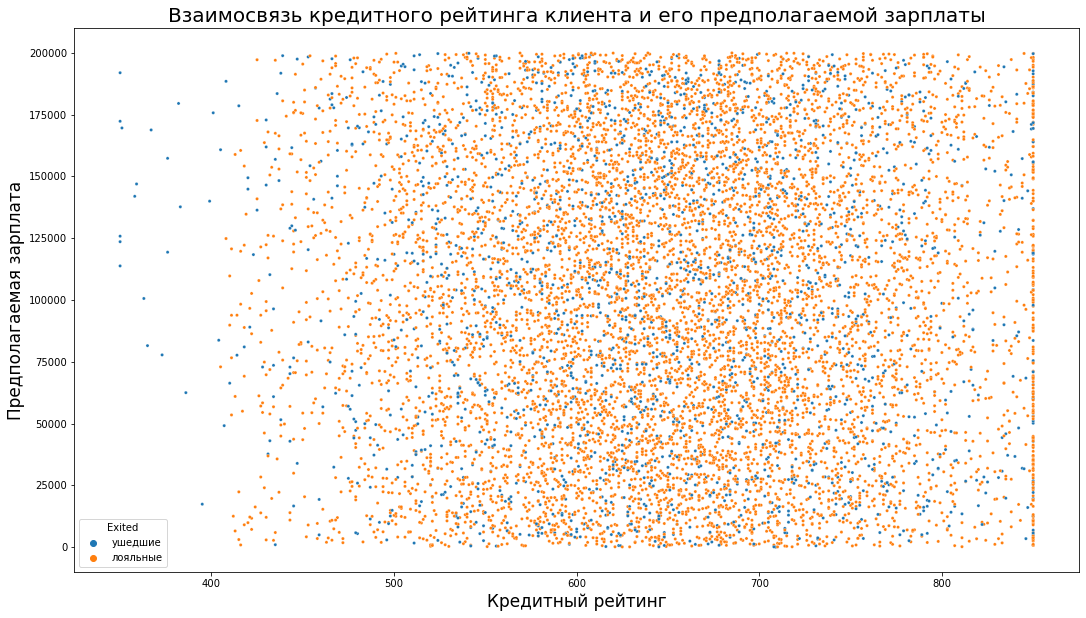

In [7]:
fig = plt.figure(figsize=(18, 10))
scallet = sns.scatterplot(
    data=churn_data,
    x='CreditScore',
    y='EstimatedSalary',
    hue=churn_data['Exited'].map({0:"лояльные", 1:"ушедшие"}),
    s=10
)

scallet.set_title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты', fontsize=20)
scallet.set_xlabel('Кредитный рейтинг', fontsize=17)
scallet.set_ylabel('Предполагаемая зарплата', fontsize=17)
plt.show()

Явной зависимости между предполагаемой зарплатой и кредитным рейтингом не наблюдается. Точки разбросаны практически равномерно по всему графику. Наибольшее число точек сконцентировано при кредитном рейтинге 600-700 и размер зарплаты на это никак не влияет. Можно лишь заметить, что у ушедших клиентов рейтинг немного ниже.

### 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [8]:
churn_gender = churn_data.groupby(['Gender'],as_index=False)['Exited'].mean()

pie = px.pie(
data_frame=churn_gender,
    values='Exited',
    names='Gender',
    title='Соотношение ушедших мужчин и женщин',
    height=500,
    width=500)
pie.show()

60.4% ушедших клиентов приходится на женщих. Женщины уходят чаще мужчин. 

### 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [9]:
churn_products = churn_data.groupby(by=['NumOfProducts', 'Exited'],
                                    as_index=False).count()[['NumOfProducts', 'RowNumber', 'Exited']]

bar = px.bar(
    data_frame=churn_products,
    y="RowNumber",
    x="NumOfProducts",
    color=churn_products['Exited'].map({0:"лояльные", 1:"ушедшие"}), 
    height=500,
    width=700,
    title='Отток клиентов в зависимости от числа приобретённых у банка услуг',
    text_auto=True,
    labels={'NumOfProducts':'Количество услуг', 'RowNumber':'Число клиентов', 'color': 'Статус лояльности'}
)
bar.show()

Наибольший отток клиентов происходит после приобретения одной услуги. После приобретения двух услуг отток клиентов снижается на 80% и увеличивается число лояльных клиентов на 7%. 53% всех лояльных клиентов предпочитают иметь 2 услуги. 3 и 4 услуги являются совсем невостребованными, отток клиентов приволирует над лояльными. Банку необходимо усовершенствовать свои услуги, делать их более привлекательными для своих клиентов. Необходимо удержать клиентов как только они приоблели одну услугу. 

### 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [10]:
churn_member = churn_data.groupby(by=['IsActiveMember', 'Exited'],
                                    as_index=False).count()[['IsActiveMember', 'RowNumber', 'Exited']]

bar = px.bar(
    data_frame=churn_member,
    y="RowNumber",
    x=churn_member["IsActiveMember"].map({0:"неактивный", 1:"активный"}),
    color=churn_member['Exited'].map({0:"лояльные", 1:"ушедшие"}), 
    height=500,
    width=500,
    title='Отток клиентов в зависимости от статуса клиента',
    text_auto=True,
    labels={'x':'Статус клиента', 'RowNumber':'Число клиентов', 'color': 'Статус лояльности'}
)
bar.show()

При неактивном статусе отток клиентов составлят 27% по отношению к лояльным клиентам, практически каждый четверный неактивный клиент покидает банк. Наличие активного статуса снижает отток клиентов почти в 2 раза. Можно сделать опрос среди клиентов банка и узнать для каких целей они открывали счет в банке. На основе самых популярных вариантов разработать программу, например в виде бонусов, которая будет стимулировать клиентов к активному пользованию и тем самым привлекать новых.

### 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [11]:
churn_geography=churn_data.groupby(['Geography'], as_index=False).mean()

choropleth=px.choropleth(
    data_frame=churn_geography,
    locations='Geography',
    locationmode = "country names",
    color = 'Exited',
    hover_name='Geography',
    width=700,
    height=500,
    labels={'Exited':'Ушедшие клиенты'},
    title='Доля ушедших клиентов на карте мира'
)
choropleth.show()

Наибольшая доля ушедших клиентов (приблизительно 50% всех ушедших клиентов) находится в Германии. Возможно в этой стране есть наиболее выгодные национальные банки.

### 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

### Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

### На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [12]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

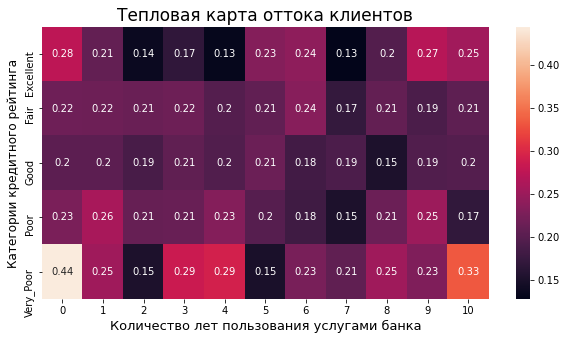

In [13]:
pivot_churn = churn_data.pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat',
    aggfunc='mean'
)
pivot_churn
plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(data=pivot_churn, annot = True)
heatmap.set_title('Тепловая карта оттока клиентов', fontsize=17),
heatmap.set_xlabel('Количество лет пользования услугами банка', fontsize=13);
heatmap.set_ylabel('Категории кредитного рейтинга', fontsize=12);

На тепловой карте можно заметить, что наибольший отток клиентов происходит на первом году при очень плохом кредитном рейтинге. И в целом при очень плохом рейтинге клиенты уходят чаще. Можно заметить незначительное снижение оттока клиентов между первым годом пользования услуг и десятым годом. Банку необходимо создать систему лояльности в зависимости от количество лет пользования услугам, тем самым попробовать удержать большее количество клиентов. А так же для клиентов с очень плохим рейтингом предложить условия, которые помогут увечить их рейтинг.